In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_wrods = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [ ]:
!pip install lime

from lime import lime_text
from lime.lime_text import LimeTextExplainer, IndexedString, IndexedCharacters, explanation
from lime.lime_base import LimeBase

sns.set(font_scale=1.3)
nltk.download('omw-1.4')

In [ ]:
train_path = "/content/drive/My Drive/train.txt"
test_path = "/content/drive/My Drive/test.txt"
val_path = "/content/drive/My Drive/val.txt"


def load_data(file_path):
    df = pd.read_csv(file_path, delimiter=';', names=['text', 'emotion'], encoding='utf-8')
    return df

df_train= load_data(train_path)
df_test = load_data(test_path)
df_val = load_data(val_path)

In [ ]:
df_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_train['emotion'].value_counts()

,count
emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [ ]:
print(df_test.shape)
df_test.head()

(2000, 2)


,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
print(df_val.shape)
df_val.head()

(2000, 2)


,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df_train['emotion'].value_counts()

,count
emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [ ]:
df_train['emotion'].value_counts() / df_train.shape[0] * 100

,count
emotion,
joy,33.51250
sadness,29.16250
anger,13.49375
fear,12.10625
love,8.15000
surprise,3.57500


<Axes: xlabel='emotion', ylabel='count'>

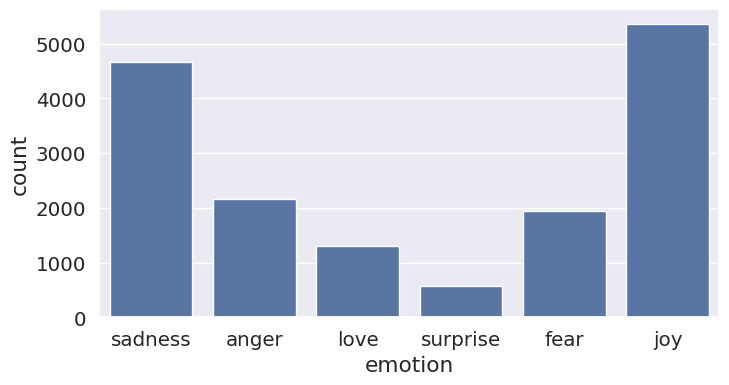

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='emotion', data=df_train)

In [ ]:
df_train.isnull().sum()

,0
text,0
emotion,0


In [ ]:
df_train.duplicated().sum()

1

In [ ]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [ ]:
df_train[df_train.duplicated() == True].index

Index([], dtype='int64')

In [ ]:
df_train[df_train['text'].duplicated() == True]

,text,emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [ ]:
df_train[df_train['text'] == df_train.iloc[7623]['text']]

,text,emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [ ]:
index = df_train[df_train['text'].duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [ ]:
df_train[df_train['text'].duplicated() == True]

,text,emotion


In [ ]:
temp = df_train.copy()
stop_words = set(stopwords.words('english'))
temp['stop_words'] = temp['text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

,count
stop_words,
5,1416
7,1405
6,1392
4,1341
8,1319
3,1263
9,1177
10,1048
2,922


<Axes: ylabel='Frequency'>

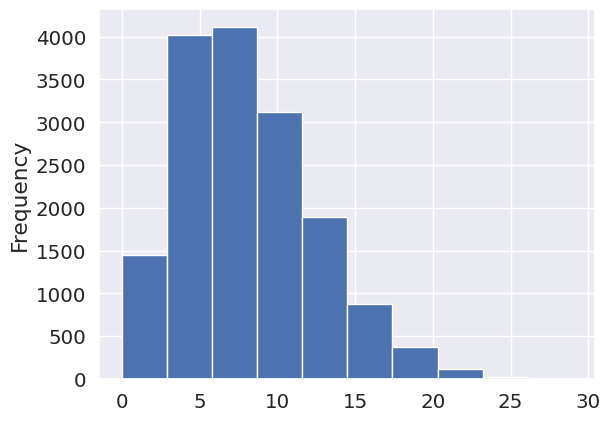

In [ ]:
temp['stop_words'].plot(kind='hist')

In [ ]:
df_test['emotion'].value_counts()

,count
emotion,
joy,695
sadness,581
anger,275
fear,224
love,159
surprise,66


<Axes: xlabel='emotion', ylabel='count'>

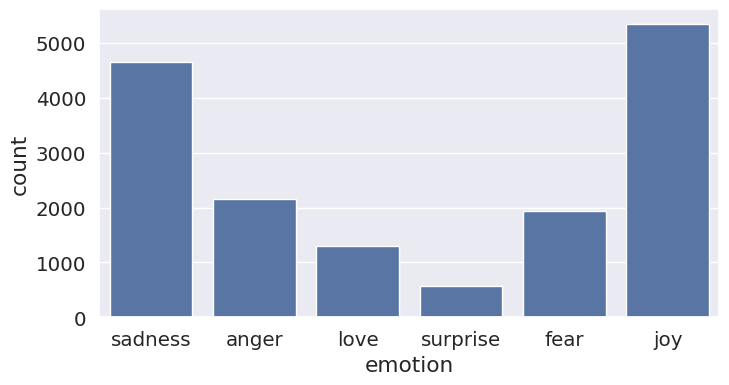

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='emotion')

In [ ]:
df_test.isnull().sum()

,0
text,0
emotion,0


In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test[df_test['text'].duplicated() == True].index

Index([], dtype='int64')

In [ ]:
temp = df_test.copy()
temp['stop_words'] = temp['text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

,count
stop_words,
7,184
6,179
3,175
5,175
4,163
9,163
8,139
10,123
2,118


<Axes: ylabel='Frequency'>

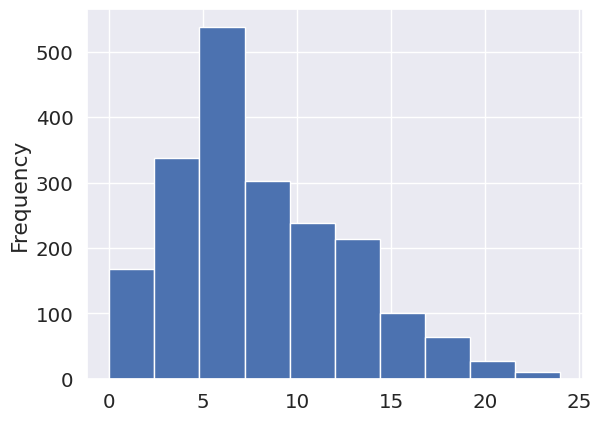

In [ ]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [ ]:
!python --version

Python 3.11.11


In [ ]:
df_val['emotion'].value_counts()

,count
emotion,
joy,704
sadness,550
anger,275
fear,212
love,178
surprise,81


<Axes: xlabel='emotion', ylabel='count'>

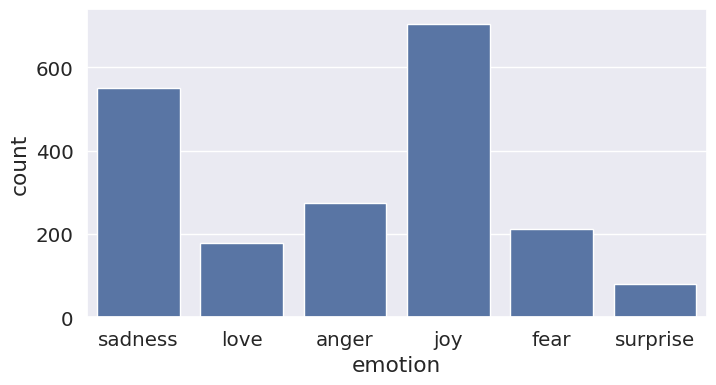

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_val, x='emotion')

In [ ]:
df_val.isnull().sum()

,0
text,0
emotion,0


In [ ]:
df_val.duplicated().sum()

0

In [ ]:
df_val[df_val['text'].duplicated() == True]

,text,emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [ ]:
df_val[df_val['text'] == df_val.iloc[603]['text']]

,text,emotion
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [ ]:
df_val[df_val['text'] == df_val.iloc[1993]['text']]

,text,emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [ ]:
index = df_val[df_val['text'].duplicated() == True].index
df_val.drop(index, axis=0, inplace=True)
df_val.reset_index(inplace=True, drop=True)

In [ ]:
df_val[df_val['text'].duplicated() == True]

,text,emotion


In [ ]:
temp = df_val.copy()
temp['stop_words'] = temp['text'].apply(lambda x : len(set(stop_words) & set(x.split())))
temp['stop_words'].value_counts()

,count
stop_words,
7,190
5,175
8,173
3,160
6,160
10,150
9,146
4,145
2,133


<Axes: ylabel='Frequency'>

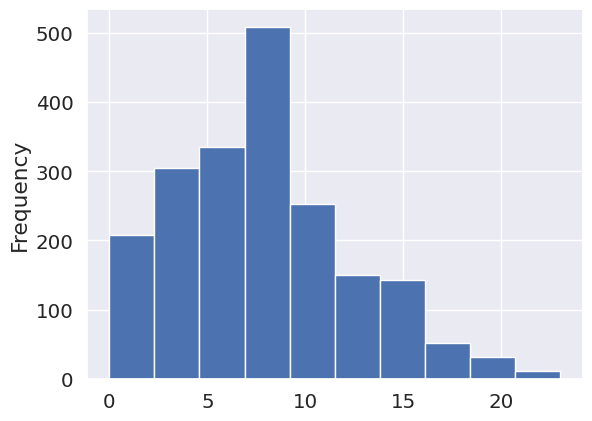

In [ ]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [ ]:
def dataframe_difference(df1, df2, which=None):
    comparision_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )

    if which is None:
        diff_df = comparision_df[comparision_df['_merge'] != 'both']
    else:
        diff_df = comparision_df[comparision_df['_merge'] == which]

    return diff_df


In [ ]:
dataframe_difference(df_train, df_test, 'both')

,text,emotion,_merge


In [ ]:
dataframe_difference(df_train, df_val, which='both')

,text,emotion,_merge


In [ ]:
dataframe_difference(df_val, df_test, which='both')

,text,emotion,_merge


In [ ]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()
    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):

    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )


    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
   for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.text=df.text.apply(lambda text : lower_case(text))
    df.text=df.text.apply(lambda text : remove_stop_words(text))
    df.text=df.text.apply(lambda text : Removing_numbers(text))
    df.text=df.text.apply(lambda text : Removing_punctuations(text))
    df.text=df.text.apply(lambda text : Removing_urls(text))
    df.text=df.text.apply(lambda text : lemmatization(text))
    return df
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data/')


[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data/...


True

In [ ]:
!unzip /usr/local/share/nltk_data/corpora/wordnet.zip -d /usr/local/share/nltk_data/corpora/

Archive:  /usr/local/share/nltk_data/corpora/wordnet.zip
   creating: /usr/local/share/nltk_data/corpora/wordnet/
  inflating: /usr/local/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/local/share/nltk_data/corpora/wordnet/README  
  infla

In [ ]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")

'name mohamed tweet play egypt'

In [ ]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

In [ ]:
df_train.head()

,text,emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [ ]:
X_train = df_train['text']
y_train = df_train['emotion']

X_test = df_test['text']
y_test = df_test['emotion']

X_val = df_val['text']
y_val = df_val['emotion']

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [ ]:
tokenizer.word_counts

OrderedDict([('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('go', 492),
             ('feeling', 6139),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('around', 347),
             ('someone', 295),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('ever', 247),
             ('nostalgic', 55),
             ('fireplace', 3),
             ('know', 977),
             ('still', 660),
             ('property', 4),
             ('grouchy', 29),
             ('ive', 659),
             ('little', 831),
             ('burdened', 67),
             ('lately', 107),
             ('wasnt', 107),
             ('sure', 270),
             ('taking', 102),
             ('milligram', 1),
             ('time', 1090),


In [ ]:
tokenizer.document_count

17969

In [ ]:
tokenizer.word_index['go']

31

In [ ]:
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [ ]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14332)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
len(sequences_train)

15969

In [ ]:
max_len = max([len(text) for text in df_train['text']])
max_len

229

In [ ]:
X_train = pad_sequences(sequences_train, maxlen=max_len, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=max_len, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=max_len, truncating='pre')

In [ ]:
vocabSize = len(tokenizer.index_word) + 1
print(f"The vocab size is {vocabSize}")

The vocab size is 14332


In [ ]:
path_to_glove_file = '/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0
embedding_index = {}

In [ ]:
import numpy as np

path_to_glove_file = "/content/drive/My Drive/glove.6B.100d.txt"
embedding_index = {}

# Load GloVe embeddings
with open(path_to_glove_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embedding_index[word] = coefs

print(f"Found {len(embedding_index)} word vectors")

# Initialize embedding matrix
num_tokens = vocabSize
embedding_dim = 100  # Adjust based on the GloVe file
embedding_matrix = np.zeros((num_tokens, embedding_dim))

hits, misses = 0, 0

# Map words in tokenizer to GloVe embeddings
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f"Converted {hits} words, missed {misses} words")


Found 400000 word vectors
Converted 13249 words, missed 1082 words


In [ ]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 100, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.build(
    input_shape=(None, X_train.shape[1])
)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 229, 100)            │       1,433,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 229, 512)            │         731,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 229, 256)            │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,216,502 (12.27 MB)

 Trainable params: 1,783,302 (6.80 MB)

 Non-trainable params: 1,433,200 (5.47 MB)

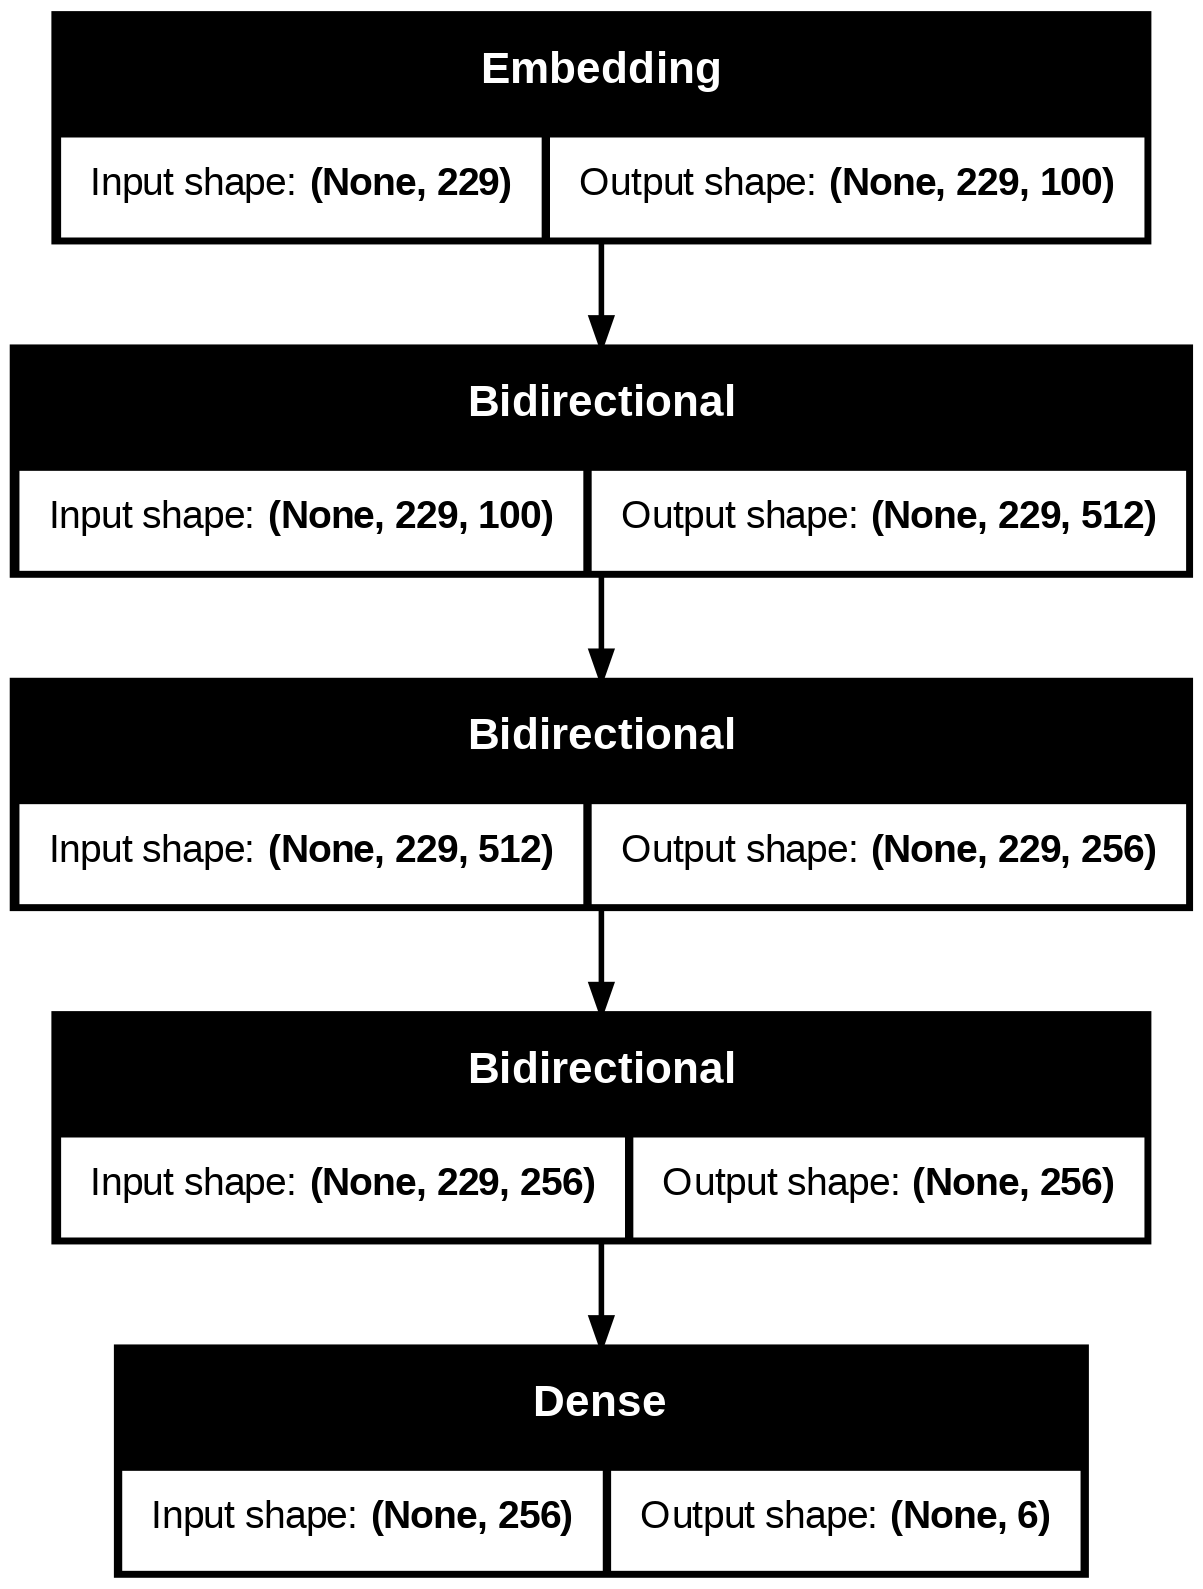

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=True,
    batch_size=256,
    epochs=30,
    callbacks=[callback]
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.4080 - loss: 1.5171 - val_accuracy: 0.6797 - val_loss: 0.9055
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.6954 - loss: 0.8419 - val_accuracy: 0.8488 - val_loss: 0.4150
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.8489 - loss: 0.4198 - val_accuracy: 0.9159 - val_loss: 0.2294
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9067 - loss: 0.2416 - val_accuracy: 0.9244 - val_loss: 0.1651
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9287 - loss: 0.1717 - val_accuracy: 0.9299 - val_loss: 0.1361
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.9385 - loss: 0.1280 - val_accuracy: 0.9359 - val_loss: 0.1325
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9444 - loss: 0.1163 - val_accuracy: 0.9329 - val_loss: 0.1418
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9471 - loss: 0.1086 - val_accuracy: 0.9309 - v

In [ ]:
model.evaluate(X_val, y_val, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9374 - loss: 0.1171


[0.12116457521915436, 0.9334334135055542]

In [ ]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['emotion']), y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 736ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       275
           1       0.92      0.87      0.89       224
           2       0.97      0.92      0.94       695
           3       0.76      0.96      0.85       159
           4       0.96      0.98      0.97       581
           5       0.72      0.74      0.73        66

    accuracy                           0.93      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.93      0.93      0.93      2000



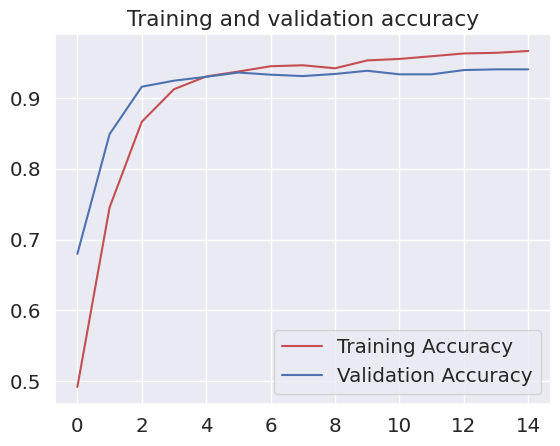

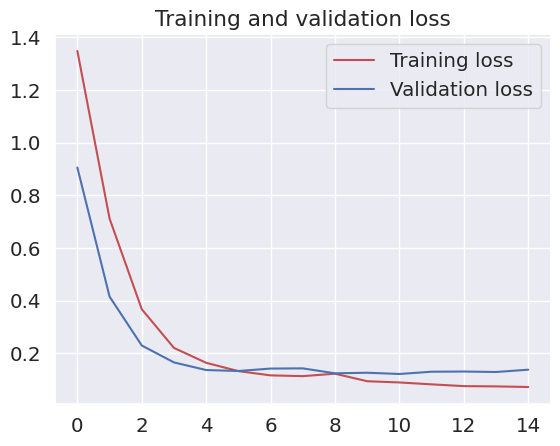

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
sentences = [
            "He's over the moon about being accepted to the university",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]

for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba = np.max(model.predict(sentence))

    print(f"{result} : {proba}")

He's over the moon about being accepted to the university
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
joy : 0.9563243985176086
Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
anger : 0.7718024253845215
I can't do it, I'm not ready to lose anything, just leave me alone
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
anger : 0.5943272113800049
Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
surprise : 0.9120895266532898
